## scikit-imageによる画像処理

In [1]:
get_ipython().magic('matplotlib inline')
import skimage
skimage.__version__

'0.12.3'

画像ファイルからデータの読み込み

In [3]:
import skimage.io
img = skimage.io.imread('DSC_3260.JPG')

データはNumPyの配列に格納されます

In [4]:
img.shape

(2160, 3840, 3)

In [5]:
img

array([[[ 68,  32,  18],
        [ 67,  31,  17],
        [ 67,  31,  17],
        ..., 
        [199, 181, 145],
        [195, 177, 141],
        [192, 174, 138]],

       [[ 68,  32,  18],
        [ 67,  31,  17],
        [ 66,  30,  16],
        ..., 
        [199, 181, 145],
        [196, 178, 142],
        [188, 170, 134]],

       [[ 67,  31,  17],
        [ 66,  30,  16],
        [ 65,  29,  15],
        ..., 
        [203, 185, 149],
        [196, 178, 142],
        [184, 166, 130]],

       ..., 
       [[ 27,  16,  14],
        [ 27,  16,  14],
        [ 27,  16,  14],
        ..., 
        [133,  97,  47],
        [130,  94,  44],
        [131,  95,  45]],

       [[ 28,  17,  15],
        [ 27,  16,  14],
        [ 27,  16,  14],
        ..., 
        [130,  94,  44],
        [126,  90,  40],
        [126,  90,  40]],

       [[ 27,  16,  14],
        [ 27,  16,  14],
        [ 27,  16,  14],
        ..., 
        [125,  89,  39],
        [126,  90,  40],
        [130,  94,

読み込んだ画像を表示させています

C:\Anaconda3\lib\site-packages\skimage\viewer\utils\core.py:10: UserWarning: Recommended matplotlib backend is `Agg` for full skimage.viewer functionality.
  warn("Recommended matplotlib backend is `Agg` for full "


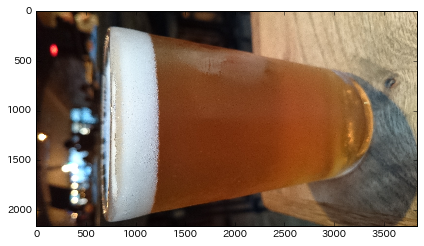

In [6]:
from skimage.viewer import ImageViewer
skimage.io.imshow(img)

横向きの画像なので90度時計回りに回転させます

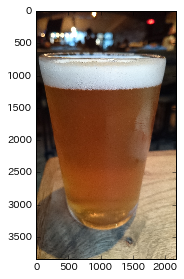

In [7]:
from skimage.transform import rotate, warp, AffineTransform
skimage.io.imshow(rotate(img, -90, resize=True))

データセットの水増しなどのために、縮尺を変えたり歪ませたりしています

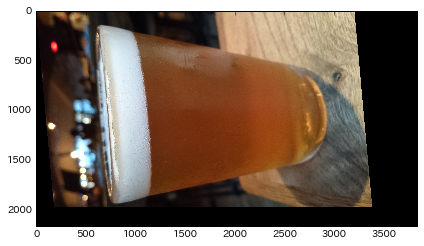

In [8]:
tform = AffineTransform(scale=(1.2, 1.1), shear=0.1)
timg = warp(img, tform.inverse)
timg = warp(img, tform)
skimage.io.imshow(timg)

## scikit-learnによる機械学習

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn import datasets

サンプルで付いている手書き文字のデータを読み込んでいます

In [10]:
digits = datasets.load_digits()

In [11]:
print(digits.data)

[[  0.   0.   5. ...,   0.   0.   0.]
 [  0.   0.   0. ...,  10.   0.   0.]
 [  0.   0.   0. ...,  16.   9.   0.]
 ..., 
 [  0.   0.   1. ...,   6.   0.   0.]
 [  0.   0.   2. ...,  12.   0.   0.]
 [  0.   0.  10. ...,  12.   1.   0.]]


64(8x8)の手書きの画像が1,797セット入っています

In [13]:
digits.data.shape

(1797, 64)

手書き画像のラベルが入っています

In [14]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

最初の画像を表示させています

C:\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:77: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  warn("Float image out of standard range; displaying "


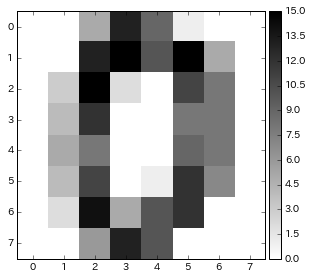

In [15]:
digits.images[0]
import skimage.io
from skimage.viewer import ImageViewer
skimage.io.imshow(digits.images[0], cmap=plt.cm.gray_r, interpolation='nearest')

SVMのモデルを使って画像の分類を行います

In [16]:
from sklearn import svm
clf = svm.SVC(gamma=0.001, C=100.)

学習データを使ってモデルの学習を行います（最後のデータ以外で学習）

In [17]:
clf.fit(digits.data[:-1], digits.target[:-1])

SVC(C=100.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

最後のデータに書かれている文字を予測します

In [18]:
clf.predict(digits.data[1796])

C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([8])

画像の表示してみます

C:\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:77: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  warn("Float image out of standard range; displaying "


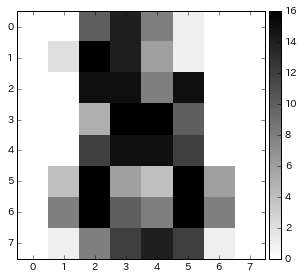

In [19]:
skimage.io.imshow(digits.images[-1:][0], cmap=plt.cm.gray_r, interpolation='nearest')

モデルの精度（正解率）を求めてみます

In [20]:
from sklearn.metrics import accuracy_score
accuracy_score(digits.target[:-1], clf.predict(digits.data[:-1]))

1.0

## END